## This project tries to find a correlation between the infection rates, death rates due to Covid-19 and various socio-economic factors such as GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices. This project tries to answer whether happiness is related to the infection and death rates due to Covid-19.    

### JHU CSSE COVID-19 Data: https://github.com/CSSEGISandData/COVID-19
### World Happiness Report Data: https://worldhappiness.report/ , https://www.kaggle.com/unsdsn/world-happiness

In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# Analysis of Infection Rate

### Preparing maximum and average infection rate data

In [2]:
corona_dataset_csv = pd.read_csv("Datasets/covid19_confirmed.csv")
display(corona_dataset_csv.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
corona_dataset_csv.drop(["Lat","Long"], axis = 1, inplace=True)
display(corona_dataset_csv.head())

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
display(corona_dataset_aggregated.head())

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


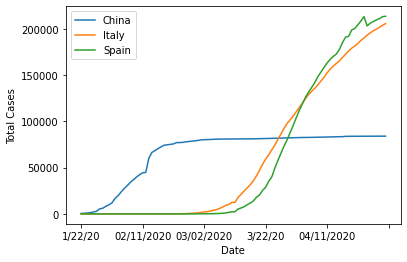

In [5]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

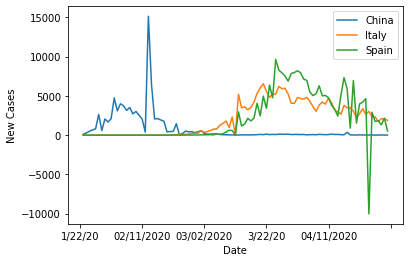

In [6]:
corona_dataset_aggregated.loc["China"].diff().plot()
corona_dataset_aggregated.loc["Italy"].diff().plot()
corona_dataset_aggregated.loc["Spain"].diff().plot()
plt.legend()
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

In [7]:
#max infection rate/max rate of change of cases
print("China:", corona_dataset_aggregated.loc["China"].diff().max())
print("Italy:", corona_dataset_aggregated.loc["Italy"].diff().max())
print("Spain:", corona_dataset_aggregated.loc["Spain"].diff().max())

China: 15136.0
Italy: 6557.0
Spain: 9630.0


In [8]:
#max infection rates for all countries
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [9]:
#average infection rates for all countries
countries = list(corona_dataset_aggregated.index)
average_infection_rates = []
for c in countries:
    new_cases = []
    
    for day in corona_dataset_aggregated.loc[c].diff():
        if(day >= 0):
            new_cases.append(day)
        
    average_infection_rates.append(np.mean(np.array(new_cases)))
        
corona_dataset_aggregated["average_infection_rate"] = average_infection_rates

In [10]:
display(corona_dataset_aggregated.head())

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate,average_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,232.0,21.929293
Albania,0,0,0,0,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,34.0,7.808081
Algeria,0,0,0,0,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,199.0,40.464646
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,43.0,7.525253
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,5.0,0.272727


In [11]:
corona_data = pd.DataFrame(corona_dataset_aggregated, columns = ["max_infection_rate","average_infection_rate"])
display(corona_data.head())

,max_infection_rate,average_infection_rate
Country/Region,,
Afghanistan,232.0,21.929293
Albania,34.0,7.808081
Algeria,199.0,40.464646
Andorra,43.0,7.525253
Angola,5.0,0.272727


### Preparing world happiness report data

In [12]:
happiness_report_csv = pd.read_csv("Datasets/worldwide_happiness_report.csv")
display(happiness_report_csv.head())

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
columns_tobedropped = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
happiness_report_csv.drop(columns_tobedropped, axis = 1, inplace = True)
display(happiness_report_csv.head())

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [14]:
happiness_report_csv.set_index("Country or region", inplace=True)
display(happiness_report_csv.head())

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Joining the above two prepared datasets

In [15]:
data = corona_data.join(happiness_report_csv, how="inner")
display(data.head())

,max_infection_rate,average_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,21.929293,0.350,0.517,0.361,0.000
Albania,34.0,7.808081,0.947,0.848,0.874,0.383
Algeria,199.0,40.464646,1.002,1.160,0.785,0.086
Argentina,291.0,44.727273,1.092,1.432,0.881,0.471
Armenia,134.0,20.868687,0.850,1.055,0.815,0.283


In [16]:
#correlation matrix
matrix1 = data.corr()
display(matrix1)

,max_infection_rate,average_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.776754,0.250118,0.191958,0.289263,0.078196
average_infection_rate,0.776754,1.000000,0.327093,0.240753,0.341210,0.029038
GDP per capita,0.250118,0.327093,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.240753,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.341210,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.029038,0.394603,0.456246,0.427892,1.000000


### Visualization of the results

#### Plots of maximum infection rate vs GDP per capita 

In [17]:
x = data["GDP per capita"]
y = data["max_infection_rate"]

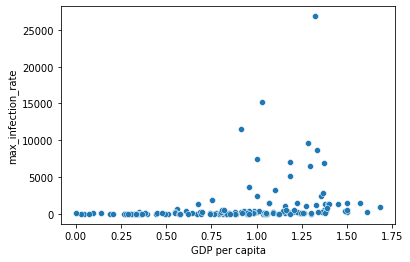

In [18]:
sns.scatterplot(x=x, y=y)
plt.show()

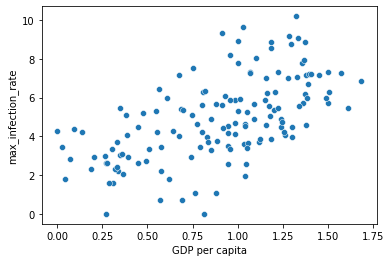

In [19]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

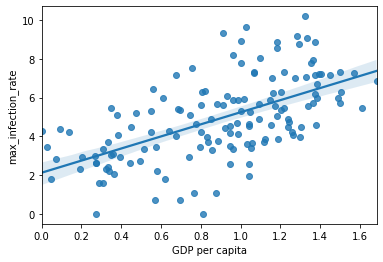

In [20]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of maximum infection rate vs Social support

In [21]:
x = data["Social support"]
y = data["max_infection_rate"]

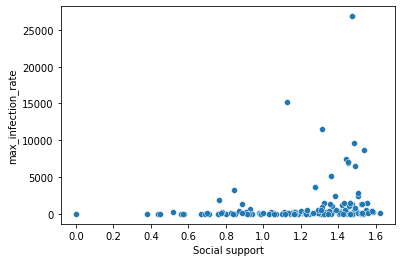

In [22]:
sns.scatterplot(x=x, y=y)
plt.show()

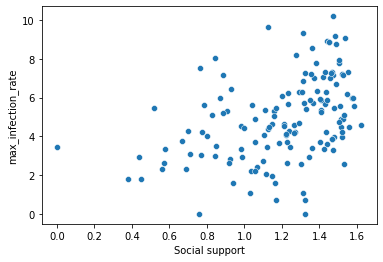

In [23]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

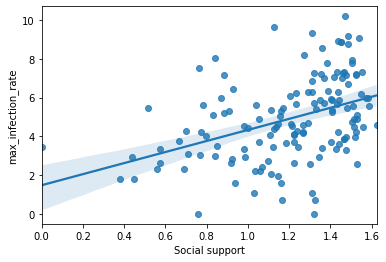

In [24]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of maximum infection rate vs Healthy life expectancy

In [25]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]

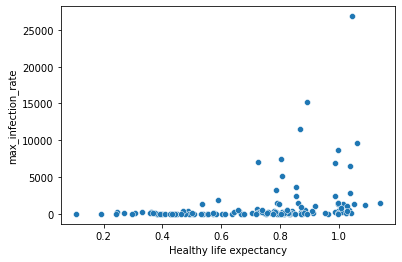

In [26]:
sns.scatterplot(x=x, y=y)
plt.show()

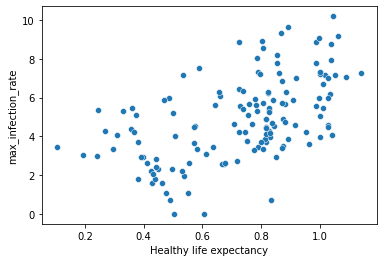

In [27]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

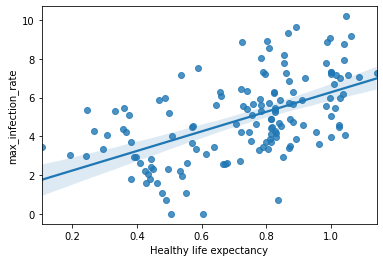

In [28]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of maximum infection rate vs Freedom to make life choices

In [29]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]

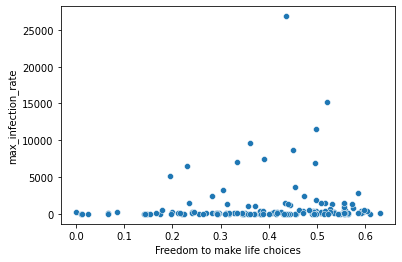

In [30]:
sns.scatterplot(x=x, y=y)
plt.show()

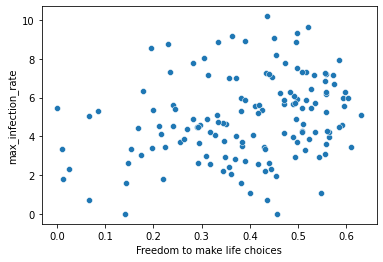

In [31]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

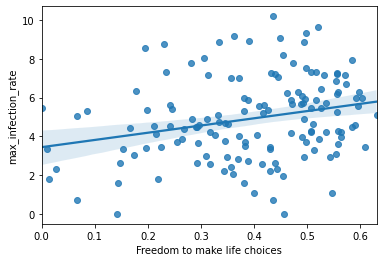

In [32]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of average infection rate vs GDP per capita 

In [33]:
x = data["GDP per capita"]
y = data["average_infection_rate"]

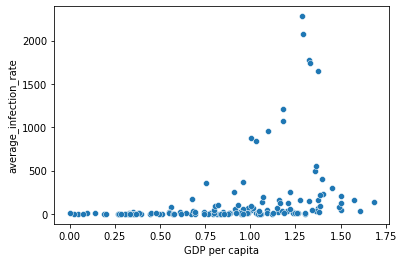

In [34]:
sns.scatterplot(x=x, y=y)
plt.show()

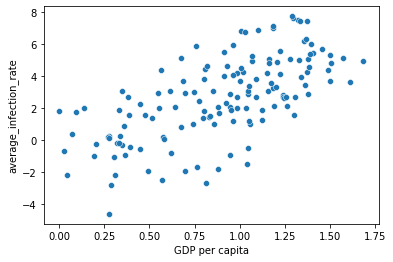

In [35]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

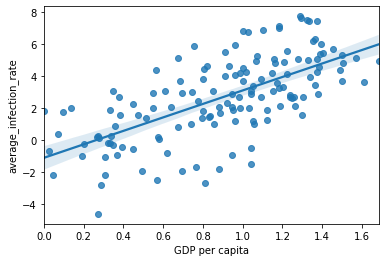

In [36]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of average infection rate vs Social support

In [37]:
x = data["Social support"]
y = data["average_infection_rate"]

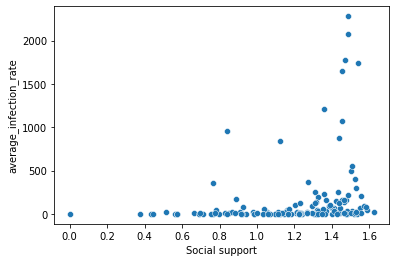

In [38]:
sns.scatterplot(x=x, y=y)
plt.show()

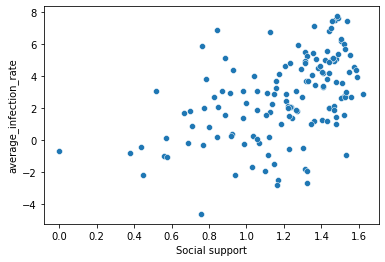

In [39]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

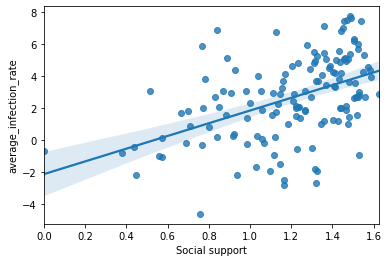

In [40]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of average infection rate vs Healthy life expectancy

In [41]:
x = data["Healthy life expectancy"]
y = data["average_infection_rate"]

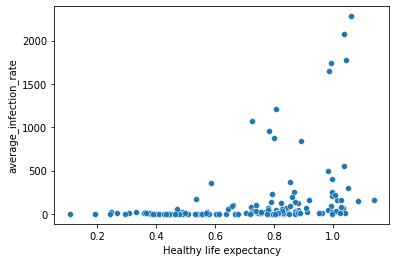

In [42]:
sns.scatterplot(x=x, y=y)
plt.show()

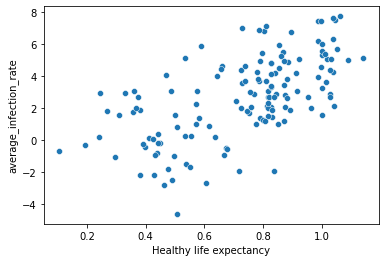

In [43]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

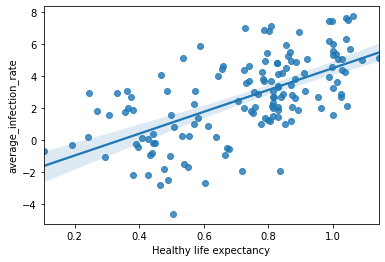

In [44]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of average infection rate vs Freedom to make life choices

In [45]:
x = data["Freedom to make life choices"]
y = data["average_infection_rate"]

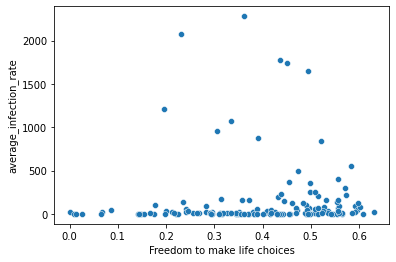

In [46]:
sns.scatterplot(x=x, y=y)
plt.show()

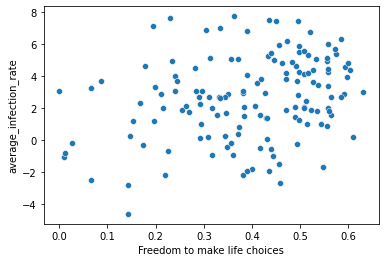

In [47]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

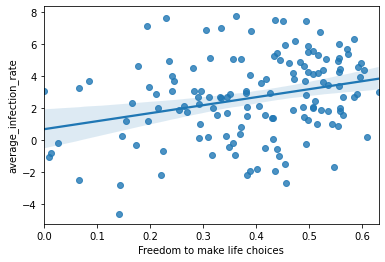

In [48]:
sns.regplot(x=x, y=np.log(y))
plt.show()

# Analysis of Death Rate

### Preparing maximum and average death rate data

In [49]:
corona_death_dataset_csv = pd.read_csv("Datasets/covid19_deaths.csv")
display(corona_death_dataset_csv.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [50]:
corona_death_dataset_csv.drop(["Lat","Long"], axis = 1, inplace=True)
display(corona_death_dataset_csv.head())

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [51]:
corona_death_dataset_aggregated = corona_death_dataset_csv.groupby("Country/Region").sum()
display(corona_death_dataset_aggregated.head())

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


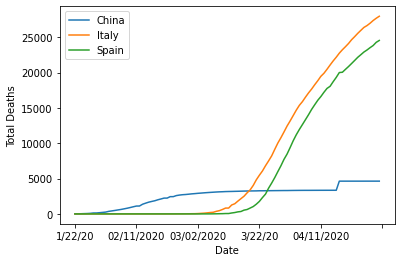

In [52]:
corona_death_dataset_aggregated.loc["China"].plot()
corona_death_dataset_aggregated.loc["Italy"].plot()
corona_death_dataset_aggregated.loc["Spain"].plot()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.show()

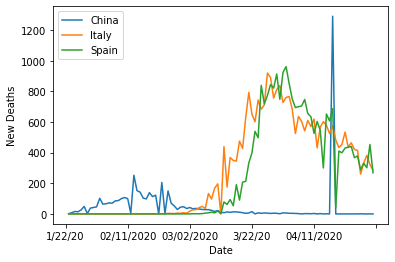

In [53]:
corona_death_dataset_aggregated.loc["China"].diff().plot()
corona_death_dataset_aggregated.loc["Italy"].diff().plot()
corona_death_dataset_aggregated.loc["Spain"].diff().plot()
plt.legend()
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.show()

In [54]:
#max death rate/max rate of change of deaths
print("China:", corona_death_dataset_aggregated.loc["China"].diff().max())
print("Italy:", corona_death_dataset_aggregated.loc["Italy"].diff().max())
print("Spain:", corona_death_dataset_aggregated.loc["Spain"].diff().max())

China: 1290.0
Italy: 919.0
Spain: 961.0


In [55]:
#max death rates for all countries
countries = list(corona_death_dataset_aggregated.index)
max_death_rates = []
for c in countries:
    max_death_rates.append(corona_death_dataset_aggregated.loc[c].diff().max())
corona_death_dataset_aggregated["max_death_rate"] = max_death_rates

In [56]:
#average death rates for all countries
countries = list(corona_death_dataset_aggregated.index)
average_death_rates = []
for c in countries:
    new_deaths = []
    
    for day in corona_death_dataset_aggregated.loc[c].diff():
        if(day >= 0):
            new_deaths.append(day)
        
    average_death_rates.append(np.mean(np.array(new_deaths)))
        
corona_death_dataset_aggregated["average_death_rate"] = average_death_rates

In [57]:
display(corona_death_dataset_aggregated.head())

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate,average_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,42,43,47,50,57,58,60,64,7.0,0.646465
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,28,28,30,30,31,4.0,0.313131
Algeria,0,0,0,0,0,0,0,0,0,0,...,407,415,419,425,432,437,444,450,30.0,4.545455
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,40,40,40,40,41,42,42,4.0,0.424242
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2.0,0.020000


In [58]:
corona_death_data = pd.DataFrame(corona_death_dataset_aggregated, columns = ["max_death_rate", "average_death_rate"])
display(corona_death_data.head())

,max_death_rate,average_death_rate
Country/Region,,
Afghanistan,7.0,0.646465
Albania,4.0,0.313131
Algeria,30.0,4.545455
Andorra,4.0,0.424242
Angola,2.0,0.020000


In [59]:
#deleting countries with 0 max death rate
countries = list(corona_death_data.index)
for c in countries:
    if corona_death_data.loc[c]["max_death_rate"] == 0:
        corona_death_data.drop(c, axis=0, inplace = True)

In [60]:
display(corona_death_data.head())

,max_death_rate,average_death_rate
Country/Region,,
Afghanistan,7.0,0.646465
Albania,4.0,0.313131
Algeria,30.0,4.545455
Andorra,4.0,0.424242
Angola,2.0,0.020000


### Joining the above prepared dataset with the happiness report dataset

In [61]:
display(happiness_report_csv.head())

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [62]:
data = corona_death_data.join(happiness_report_csv, how="inner")
display(data.head())

,max_death_rate,average_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.646465,0.350,0.517,0.361,0.000
Albania,4.0,0.313131,0.947,0.848,0.874,0.383
Algeria,30.0,4.545455,1.002,1.160,0.785,0.086
Argentina,13.0,2.202020,1.092,1.432,0.881,0.471
Armenia,3.0,0.323232,0.850,1.055,0.815,0.283


In [63]:
#correlation matrix
matrix2 = data.corr()
display(matrix2)

,max_death_rate,average_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.882110,0.245063,0.202206,0.302945,0.082132
average_death_rate,0.882110,1.000000,0.241609,0.208705,0.292424,0.006115
GDP per capita,0.245063,0.241609,1.000000,0.750481,0.865584,0.406969
Social support,0.202206,0.208705,0.750481,1.000000,0.756453,0.457669
Healthy life expectancy,0.302945,0.292424,0.865584,0.756453,1.000000,0.426723
Freedom to make life choices,0.082132,0.006115,0.406969,0.457669,0.426723,1.000000


### Visualization of the results

#### Plots of maximum death rate vs GDP per capita 

In [64]:
x = data["GDP per capita"]
y = data["max_death_rate"]

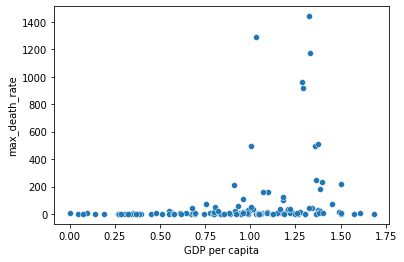

In [65]:
sns.scatterplot(x=x, y=y)
plt.show()

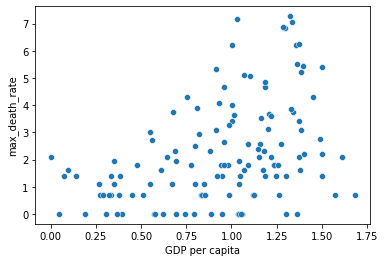

In [66]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

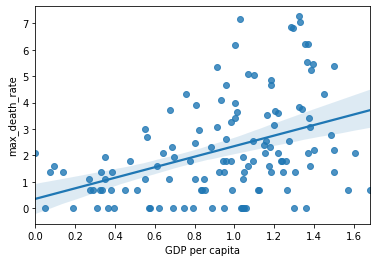

In [67]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of maximum death rate vs Social support

In [68]:
x = data["Social support"]
y = data["max_death_rate"]

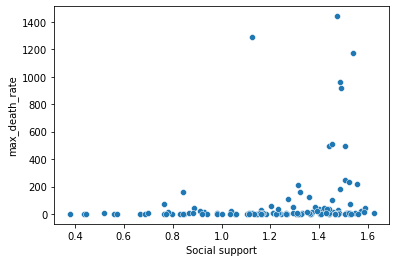

In [69]:
sns.scatterplot(x=x, y=y)
plt.show()

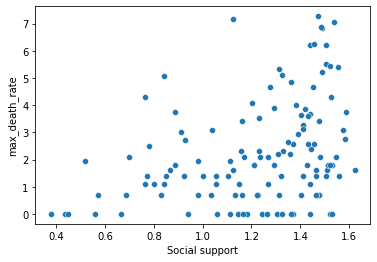

In [70]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

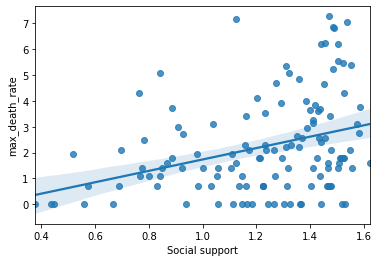

In [71]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of maximum death rate vs Healthy life expectancy

In [72]:
x = data["Healthy life expectancy"]
y = data["max_death_rate"]

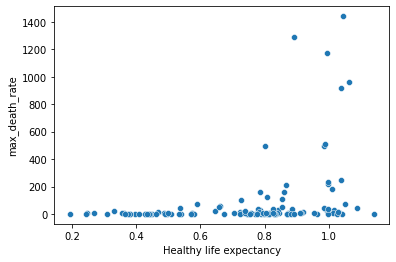

In [73]:
sns.scatterplot(x=x, y=y)
plt.show()

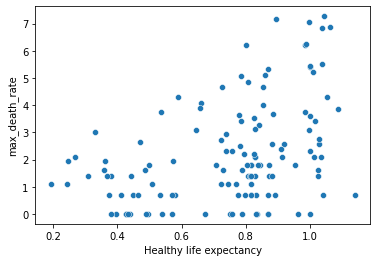

In [74]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

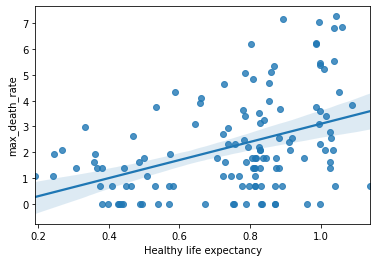

In [75]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of maximum death rate vs Freedom to make life choices

In [76]:
x = data["Freedom to make life choices"]
y = data["max_death_rate"]

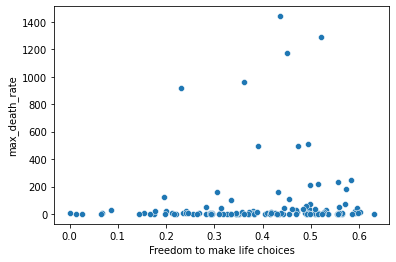

In [77]:
sns.scatterplot(x=x, y=y)
plt.show()

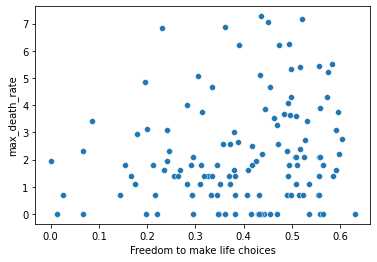

In [78]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

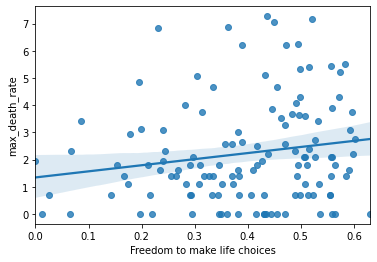

In [79]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of average death rate vs GDP per capita 

In [80]:
x = data["GDP per capita"]
y = data["average_death_rate"]

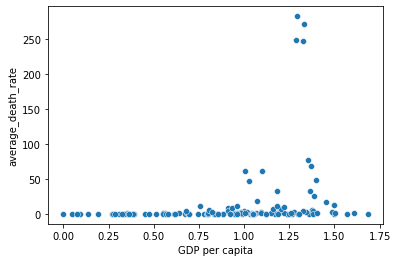

In [81]:
sns.scatterplot(x=x, y=y)
plt.show()

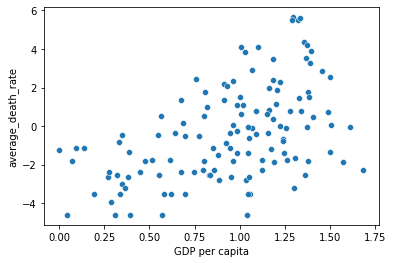

In [82]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

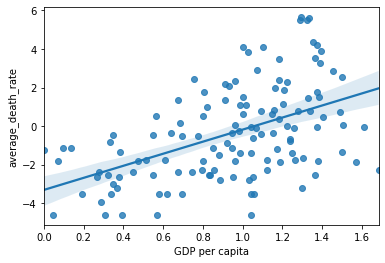

In [83]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of average death rate vs Social support

In [84]:
x = data["Social support"]
y = data["average_death_rate"]

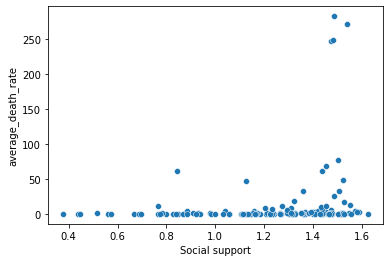

In [85]:
sns.scatterplot(x=x, y=y)
plt.show()

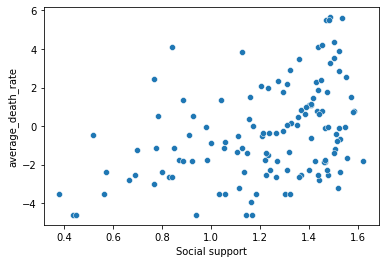

In [86]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

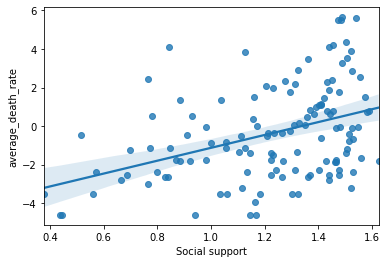

In [87]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of average death rate vs Healthy life expectancy

In [88]:
x = data["Healthy life expectancy"]
y = data["average_death_rate"]

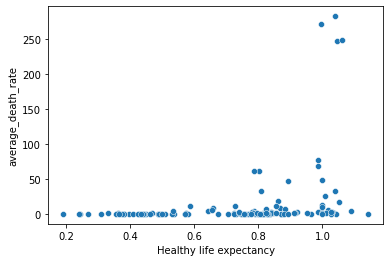

In [89]:
sns.scatterplot(x=x, y=y)
plt.show()

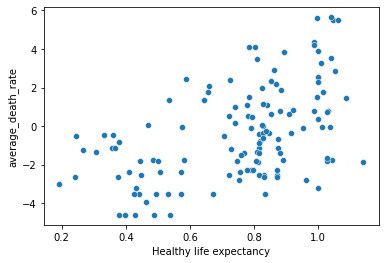

In [90]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

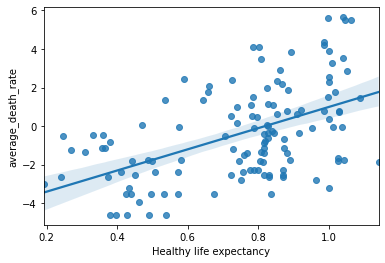

In [91]:
sns.regplot(x=x, y=np.log(y))
plt.show()

#### Plots of average death rate vs Freedom to make life choices

In [92]:
x = data["Freedom to make life choices"]
y = data["average_death_rate"]

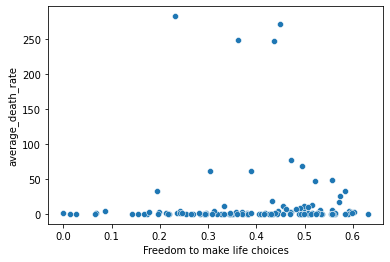

In [93]:
sns.scatterplot(x=x, y=y)
plt.show()

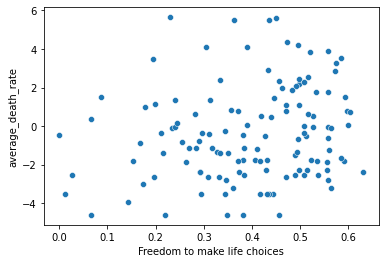

In [94]:
sns.scatterplot(x=x, y=np.log(y))
plt.show()

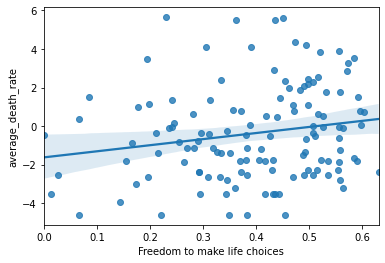

In [95]:
sns.regplot(x=x, y=np.log(y))
plt.show()

# Results

In [96]:
display(matrix1)
display(matrix2)

,max_infection_rate,average_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.776754,0.250118,0.191958,0.289263,0.078196
average_infection_rate,0.776754,1.000000,0.327093,0.240753,0.341210,0.029038
GDP per capita,0.250118,0.327093,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.240753,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.341210,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.029038,0.394603,0.456246,0.427892,1.000000


,max_death_rate,average_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.882110,0.245063,0.202206,0.302945,0.082132
average_death_rate,0.882110,1.000000,0.241609,0.208705,0.292424,0.006115
GDP per capita,0.245063,0.241609,1.000000,0.750481,0.865584,0.406969
Social support,0.202206,0.208705,0.750481,1.000000,0.756453,0.457669
Healthy life expectancy,0.302945,0.292424,0.865584,0.756453,1.000000,0.426723
Freedom to make life choices,0.082132,0.006115,0.406969,0.457669,0.426723,1.000000


### From the correlation matrices above and their visualisation through graphs, we can see a positive correlation between maximum infection rate, average infection rate, maximum death rate, average death rate and the socio-economic factors from the world happiness report, namely GDP per capita, Social support, Healthy Life Expectancy and Freedom to make life choices. 
### Now, a positive correlation implies that when one variable increases, the other increases as well. The linear regression plots and the scatterplots provide further evidence for this. This however, does not imply a cause and effect relationship between the variables. The conclusion drawn from this analysis is that people in developed and developing countries are more prone to catching the infection and dying from it than people in under-developed countries. The reasons behind this are not exactly clear. However, one can reason that this might be due to the lesser availability of testing kits in under-developed countries, which results in fewer infections being reported and consequently fewer deaths being reported due to Covid-19.
### However, if this is not the case, then we have answered the problem raised before this analysis that happiness is indeed related to infection and death rates due to Covid-19 with a positive correlation.